# Pupil Core Headset


## User Guide

The following steps can be found on the [PupilLabs website](https://docs.pupil-labs.com/core/#_1-put-on-pupil-core): 
1. Make sure when you put on the headset there is space between your forehead and the headset frame
2. Launch the Pupil Capture application from the launchpad
3. Pupil Capture will give you three screens, one large screen for the world view camera and the other two for the left and right eye respectively
4. You will have to physically adjust the eye camera on your pupil core headset to get good images
    - The eye camera has two movements, Slider and Rotation
    - The eye camera arm can slide in and out of the frame
    - The second level of adjustment can be made by rotating the ball joint, twisting and hinging the joint should give you a better visualization of the eye
    - More information on how you to handle the headset is give [here](https://docs.pupil-labs.com/core/hardware/#headset-adjustments)
6. You need to check if the pupil is detected by the headset, even at extreme angles of the eyeballs.
    - For optimum outputs ensure your Eye windows on pupil capture present a green circle around the eye and a red circle around the pupil
    - To test the range of capture move your head from left to right and ensure that the pupils are mapped in red for the duration of motion

## Optimum Eye Capture

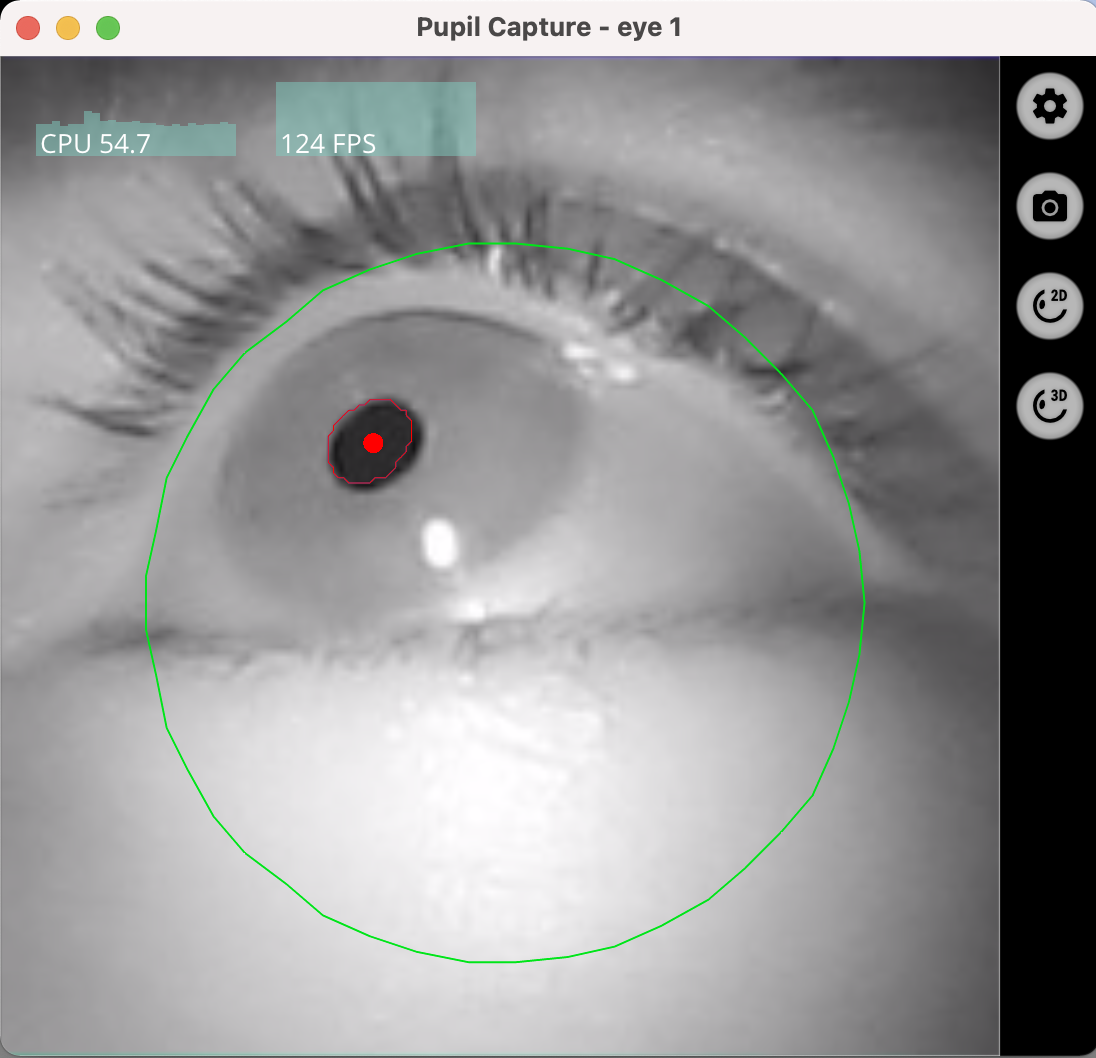

In [2]:
from IPython.display import Image
Image(filename='/Users/noelalben/gtcmtmasters/GRA/Pupilometry Research/Notebooks/eyecorrect.png')

## Recording Data

Once you've completed these stages you can now begin recording.
1. Pupil Capture saves the recordings in a folder of your main user directory named "recordings"
2. Press r on your keyboard or the R on your main window to begin and end recording

### Accessing Recorded Data
You will find a number of files in the recordings directory, they're purpose and list is given below:
### Meta File (required)
- info.player.json

### Notifications (required)
- notify_timestamps.npy
- notify.pldata

### World Video Files
- world_timestamps.npy
- world.intrinsics
- world.mp4

### Eye Video Files (only required for Offline Pupil Detection)
- eye0_timestamps.npy
- eye0.mp4


### Pupil Data
- pupil_timestamps.npy
- pupil.pldata

### Gaze Data
- gaze_timestamps.npy
- gaze.pldata

### Annotations
- annotation_timestamps.npy
- annotation.pldata

### Audio Capture
- audio_timestamps.npy
- audio.mp4

### Blink Detector
- blinks_timestamps.npy
- blinks.pldata

### Fixation Detector
- fixations_timestamps.npy
- fixations.pldata

### Surface Tracker
- surface_definitions
- surface_definitions_v01

### User Info
- user_info.csv

## Pupil Player
Open the Pupil Player Software and drag your recording directory into it, you are now able to add plugins and visualise the relevant pupilometry data.

You can control what files are exported, [this](https://docs.pupil-labs.com/core/software/pupil-player/#export) link contains all the relevant information.
Once you select the relevant files to be exported, press 'r' on your keyboard while in the pupil capture window.

## Loading Data

In [3]:
import os

# Add your recording directory here
recording_location = '/Users/noelalben/Downloads/Recording2(15_09_2021)'

def print_file_structure(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in sorted(files):
            print(f'{subindent}{f}')
print_file_structure(recording_location)

Recording2(15_09_2021)/
    .DS_Store
    000/
        .DS_Store
        Default.plmodel
        blinks.pldata
        blinks_timestamps.npy
        eye0.intrinsics
        eye0.mp4
        eye0_lookup.npy
        eye0_timestamps.npy
        eye1.intrinsics
        eye1.mp4
        eye1_lookup.npy
        eye1_timestamps.npy
        fixations.pldata
        fixations_timestamps.npy
        gaze.pldata
        gaze_timestamps.npy
        info.player.json
        notify.pldata
        notify_timestamps.npy
        pupil.pldata
        pupil_timestamps.npy
        square_marker_cache
        surface_definitions_v01
        user_info.csv
        world.fake
        world.intrinsics
        world_lookup.npy
        exports/
            .DS_Store
            000/
                .DS_Store
                blink_detection_report.csv
                blinks.csv
                export_info.csv
                eye0.mp4
                eye0_timestamps.csv
                eye0_timestamps.npy
        

As you can see, the exports from the Pupil Player are put into a new folder 000 and 001 and you can control your exports as subsections of your entire recording and export multiple subsections of a single recording. 

## Visualizing the Data


To visualize pupil diameter and pupil location we need the following files from the raw export:
1. export_info.csv - Meta information on the export containing e.g. the export date or the data format version.
2. pupil_positions.csv - A list of all pupil datums. See below for more information.
3. gaze_positions.csv - A list of all gaze datums. See below for more information.
4. pupil_gaze_positions_info.txt - Contains documentation on the contents of pupil_positions.csv and gaze_positions.csv

Let's look at the data in pupil_positions.csv

In [11]:
import pandas as pd
#We use pandas to load the csv into a dataframe that we can manupilate, 
#the file location of the pupil_positions.csv can be found using the directory listing given above
#From the folder recording input just find the '/' and add each preceeding term into the next function
exported_pupil_csv = os.path.join(recording_location,  '000','exports','000', 'pupil_positions.csv')
pupil_pd_frame = pd.read_csv(exported_pupil_csv)

In [12]:
pupil_pd_frame

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_y,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle
0,4060.446514,0,0,1.000000,0.302787,0.440937,42.852917,2d c++,121.114861,223.625053,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4060.446514,0,0,1.000000,0.302787,0.440942,42.852892,pye3d 0.0.7 real-time,121.114673,223.623019,...,0.179661,-0.724667,1.516976,1.390154,-2.313485,208.348005,202.833467,259.522926,259.522926,0.0
2,4060.448879,0,1,1.000000,0.396020,0.542072,42.319762,pye3d 0.0.7 real-time,158.408029,183.171313,...,-0.204345,-0.933381,1.279556,1.776591,-1.876945,201.008718,209.494609,291.165210,291.165210,0.0
3,4060.448879,0,1,1.000000,0.396021,0.542013,42.323997,2d c++,158.408447,183.194794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4060.454847,0,0,1.000000,0.302423,0.440875,42.730091,2d c++,120.969376,223.649803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4060.454847,0,0,1.000000,0.302428,0.440879,42.730537,pye3d 0.0.7 real-time,120.971236,223.648584,...,0.179631,-0.724363,1.512848,1.390185,-2.313947,208.348005,202.833467,259.522926,259.522926,0.0
6,4060.457212,0,1,1.000000,0.395842,0.542100,42.248099,pye3d 0.0.7 real-time,158.336614,183.159814,...,-0.204020,-0.933041,1.277364,1.776259,-1.878316,201.008718,209.494609,291.165210,291.165210,0.0
7,4060.457212,0,1,1.000000,0.395877,0.542085,42.248127,2d c++,158.350952,183.165909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4060.463180,1,0,1.000000,0.302253,0.441204,43.018032,2d c++,120.901237,223.518250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4060.463180,1,0,1.000000,0.302261,0.441180,43.018374,pye3d 0.0.7 real-time,120.904369,223.528046,...,0.179852,-0.723951,1.523141,1.389960,-2.314522,208.348005,202.833467,259.522926,259.522926,0.0


As you can see it's a large dataframe that contains many columns that represent both the 2D and 3D pupil detector.
Choosing what detection you need for your experiment can be found [here](https://docs.pupil-labs.com/core/best-practices/#choose-the-right-gaze-mapping-pipeline).

The subset of values that we will look into are:
1. pupil_timestamp - The timestamp at which the sample was recorded.
2. eye_id - Identifies the eye to which the sample belongs to. By default samples with id = 0 belong to the right eye, while samples with id = 1 belong to the left eye (from the wearer's POV!).
3. confidence - Confidence in the pupil detection.
4. norm_pos - The normalized position of the pupil in the eye image. (0,0) is bottom left corner of the eye image frame; (1,1) is the top right corner of the eye image frame.
5. diameter_3d - The pupil diameter in mm.
6. method - Which pupil detector was used to produce this datum. <br />
For more examples vist [here](https://docs.pupil-labs.com/developer/core/overview/#pupil-datum-format)

In [25]:
from IPython.display import display

#We just need 2d data
detector_2d_data = pupil_pd_frame[pupil_pd_frame.method == '2d c++']

#split in left/right eye
eye0_df = detector_2d_data[detector_3d_data.eye_id == 0]
eye1_df = detector_2d_data[detector_3d_data.eye_id == 1]
pd.options.display.float_format = '{:.3f}'.format

print("eye0 (right eye) data:")
display(eye0_df[['pupil_timestamp', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter','method']].head(10))

print("eye1 data (left eye) data:")
display(eye1_df[['pupil_timestamp', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter','method']].head(10))

eye0 (right eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method
0,4060.447,0,1.000,0.303,0.441,42.853,2d c++
4,4060.455,0,1.000,0.302,0.441,42.730,2d c++
8,4060.463,0,1.000,0.302,0.441,43.018,2d c++
13,4060.472,0,1.000,0.303,0.441,42.582,2d c++
16,4060.480,0,1.000,0.303,0.441,43.022,2d c++
20,4060.488,0,1.000,0.303,0.441,42.810,2d c++
24,4060.497,0,1.000,0.302,0.441,42.723,2d c++
28,4060.505,0,1.000,0.302,0.441,42.901,2d c++
33,4060.513,0,1.000,0.302,0.441,42.619,2d c++
37,4060.522,0,1.000,0.302,0.441,42.962,2d c++


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method
3,4060.449,1,1.000,0.396,0.542,42.324,2d c++
7,4060.457,1,1.000,0.396,0.542,42.248,2d c++
11,4060.466,1,1.000,0.396,0.542,42.353,2d c++
15,4060.474,1,1.000,0.396,0.542,42.265,2d c++
18,4060.482,1,0.988,0.396,0.542,42.464,2d c++
23,4060.491,1,1.000,0.396,0.542,42.813,2d c++
27,4060.499,1,1.000,0.396,0.542,42.353,2d c++
31,4060.507,1,1.000,0.396,0.542,43.019,2d c++
34,4060.516,1,1.000,0.396,0.542,42.434,2d c++
39,4060.524,1,0.997,0.396,0.542,42.611,2d c++


In [21]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Pupil Diameter')

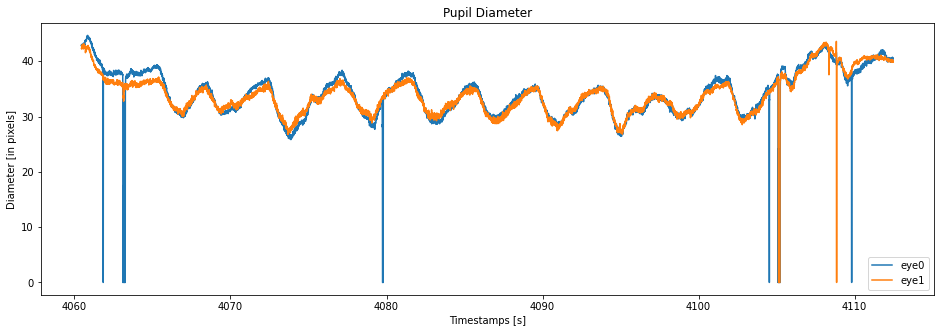

In [23]:
plt.figure(figsize=(16, 5))
plt.plot(eye0_df['pupil_timestamp'], eye0_df['diameter'])
plt.plot(eye1_df['pupil_timestamp'], eye1_df['diameter'])
plt.legend(['eye0', 'eye1'])
plt.xlabel('Timestamps [s]')
plt.ylabel('Diameter [in pixels]')
plt.title('Pupil Diameter')